## **Exercise:** Make a neural network to fit the sklearn moon dataset

In [1]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
#plt.style.use('seaborn')
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons

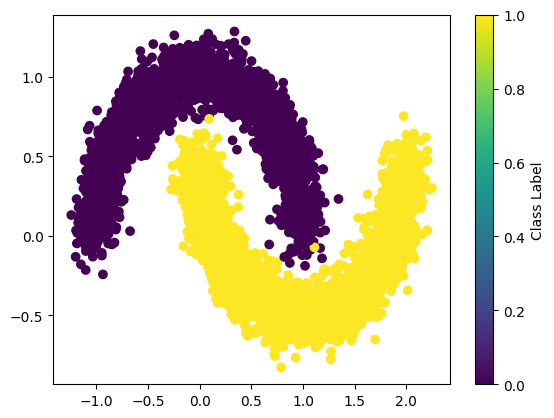

In [3]:
X,Y = datasets.make_moons(n_samples=5000, shuffle=True, noise=0.1, random_state=1234)
y = np.reshape(Y, (len(Y),1))

plt.figure()
scatter = plt.scatter(X[:,0], X[:,1], c=Y)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Class Label")
plt.show()

In [4]:
# Make training and testing dataset
from torch.utils.data import Dataset

len_train = int(0.7*len(X))
X_train,  y_train= X[0:len_train] , Y[0:len_train] # take first 70 % as training data
X_test, y_test = X[len_train:], Y[len_train:]      # remainig 30% as testing data


class MoonDataset(Dataset):
    def __init__(self,X,y):
        self.features = X
        self.labels = y

    def __getitem__(self, index):
        one_x = self.features[index]
        one_y = self.labels[index]
        return one_x, one_y

    def __len__(self):
        return self.labels.shape[0]

train_ds = MoonDataset(X_train, y_train)
test_ds = MoonDataset(X_test, y_test)

In [5]:
from torch.utils.data import DataLoader
## Question: What is the purpose of dataloader

train_loader = DataLoader(
    dataset=train_ds, batch_size=100, shuffle=True, num_workers=0, drop_last=True
)

test_loader = DataLoader(
    dataset=test_ds, batch_size=100, shuffle=True, num_workers=0, drop_last = True
)


In [6]:
# define your model

# model definition
class MoonModel(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.layers = torch.nn.Sequential(
            torch.nn.Linear(2, 30),
            torch.nn.ReLU(),
            torch.nn.Linear(30,20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, 2)
        )
    def forward(self, x):
        logits = self.layers(x)
        return logits

# instantiate the model
model = MoonModel()

In [7]:
# test the model for a sample prediction
features, labels = list(train_loader)[0]
model(features.float())


tensor([[ 0.1292, -0.0587],
        [ 0.1332, -0.1825],
        [ 0.1370, -0.1780],
        [ 0.1319, -0.0296],
        [ 0.1667, -0.0022],
        [ 0.1540,  0.0292],
        [ 0.1403,  0.0453],
        [ 0.1396, -0.1577],
        [ 0.1352,  0.0481],
        [ 0.1429,  0.0420],
        [ 0.1348, -0.0702],
        [ 0.1533, -0.0102],
        [ 0.1650,  0.0047],
        [ 0.1578,  0.0326],
        [ 0.1526,  0.0145],
        [ 0.1632, -0.0026],
        [ 0.1381,  0.0396],
        [ 0.1325,  0.0493],
        [ 0.1565,  0.0026],
        [ 0.1344, -0.1792],
        [ 0.1319, -0.0780],
        [ 0.1623,  0.0351],
        [ 0.1299, -0.1643],
        [ 0.1520,  0.0314],
        [ 0.1535, -0.0342],
        [ 0.1295, -0.1625],
        [ 0.1418,  0.0365],
        [ 0.1470, -0.1237],
        [ 0.1534,  0.0108],
        [ 0.1516, -0.0798],
        [ 0.1620,  0.0318],
        [ 0.1452,  0.0381],
        [ 0.1431, -0.0091],
        [ 0.1400,  0.0372],
        [ 0.1474,  0.0359],
        [ 0.1553,  0

In [8]:
# training loop on Moon dataset
import torch.nn.functional as F

optimizer = torch.optim.SGD( model.parameters(), lr=0.5)
num_epochs = 20

losses = []

for epoch in range(num_epochs):
    model.train() # puts the model in training mode

    # loop over all the batches
    for batch_idx, (features, labels) in enumerate(train_loader):

        # calculate error for this batch
        logits = model(features.float())
        loss = F.cross_entropy(logits, labels)
        losses.append(loss.item())

        # update weights
        optimizer.zero_grad()  # erases maybe old stored gradients. Just to be safe
        loss.backward()        # computes gradients
        optimizer.step()       # adjust weights w_new = w_old + lr*(-grad L)

        ## Log the current loass
        print(f"Epoch: {epoch+1:02d}/{num_epochs:02d}"
              f" | Batch {batch_idx:02d}/{len(train_loader):02d}"
              f" | Train Loss: {loss:0.2f}")

    model.eval() # puts the model in eval mode

Epoch: 01/20 | Batch 00/35 | Train Loss: 0.71
Epoch: 01/20 | Batch 01/35 | Train Loss: 0.67
Epoch: 01/20 | Batch 02/35 | Train Loss: 0.64
Epoch: 01/20 | Batch 03/35 | Train Loss: 0.60
Epoch: 01/20 | Batch 04/35 | Train Loss: 0.58
Epoch: 01/20 | Batch 05/35 | Train Loss: 0.52
Epoch: 01/20 | Batch 06/35 | Train Loss: 0.46
Epoch: 01/20 | Batch 07/35 | Train Loss: 0.40
Epoch: 01/20 | Batch 08/35 | Train Loss: 0.37
Epoch: 01/20 | Batch 09/35 | Train Loss: 0.31
Epoch: 01/20 | Batch 10/35 | Train Loss: 0.33
Epoch: 01/20 | Batch 11/35 | Train Loss: 0.32
Epoch: 01/20 | Batch 12/35 | Train Loss: 0.27
Epoch: 01/20 | Batch 13/35 | Train Loss: 0.39
Epoch: 01/20 | Batch 14/35 | Train Loss: 0.33
Epoch: 01/20 | Batch 15/35 | Train Loss: 0.46
Epoch: 01/20 | Batch 16/35 | Train Loss: 0.61
Epoch: 01/20 | Batch 17/35 | Train Loss: 0.35
Epoch: 01/20 | Batch 18/35 | Train Loss: 0.31
Epoch: 01/20 | Batch 19/35 | Train Loss: 0.24
Epoch: 01/20 | Batch 20/35 | Train Loss: 0.32
Epoch: 01/20 | Batch 21/35 | Train

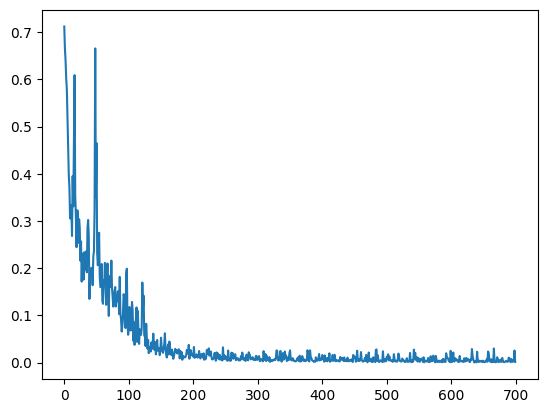

In [9]:
plt.plot(losses)

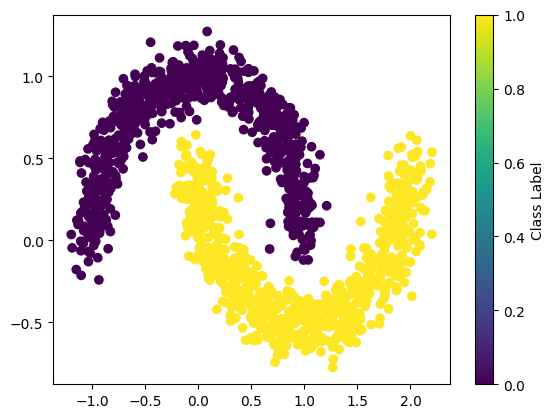

In [10]:
plt.figure()
scatter = plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Class Label")
plt.show()

In [11]:
def compute_accuracy(model, dataloader):
    model = model.eval()
    correct=0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):
        with torch.no_grad():
            logits = model(features.float())
        predictions = torch.argmax(logits, dim=-1)
        compare = torch.argmax(logits, dim=-1)
        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)
    return (correct/total_examples)

print("test accuracy = ", compute_accuracy(model, test_loader))

test accuracy =  tensor(0.9987)


In [12]:
# Save the model
torch.save(model.state_dict(), "moon_model_2.pth")

In [13]:
#Reload the model from file
model_moon = MoonModel()
model_moon.load_state_dict(torch.load("moon_model_2.pth"))

<All keys matched successfully>

In [14]:
# make predictions from the imported model

with torch.no_grad():
    logits = model_moon(torch.tensor([0.5, 0.2]))

out = torch.argmax(logits, dim=-1)
out

tensor(1)

# Hyperparameter Tuning with Raytune

In [15]:
from ray import tune

def objective(config):
    score = config["a"]**2 + config["b"]
    return {"score": score}


search_space = {
    "a": tune.grid_search([0.001, 0.01, 0.1, 1.0]),
    "b": tune.choice([1,2,3])
}

tune = tune.Tuner(objective, param_space = search_space)

results = tune.fit()
print(results.get_best_result(metric="score", mode="min").config)

2025-02-01 09:57:12,846	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/teamspace/studios/this_studio/ray_results/objective_2025-02-01_09-57-08' in 0.0081s.
2025-02-01 09:57:12,851	INFO tune.py:1041 -- Total run time: 2.33 seconds (2.29 seconds for the tuning loop).


{'a': 0.01, 'b': 1}


## Tuning for the moondata example

In [16]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

from ray import train, tune
from ray.tune.schedulers import ASHAScheduler

In [17]:
def train_func(model, optimizer, train_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        # calculate error for this batch
        logits = model(features.float())
        loss = F.cross_entropy(logits, labels)
        losses.append(loss.item())

        # update weights
        optimizer.zero_grad()  # erases maybe old stored gradients. Just to be safe
        loss.backward()        # computes gradients
        optimizer.step()       # adjust weights w_new = w_old + lr*(-grad L)


In [18]:
def test_fun(model, dataloader):
    model = model.eval()
    correct=0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):
        with torch.no_grad():
            logits = model(features.float())
        predictions = torch.argmax(logits, dim=-1)
        compare = torch.argmax(logits, dim=-1)
        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)
    return (correct/total_examples).item()

In [19]:
test_fun(model, test_loader)

0.9993333220481873

In [20]:
import os
import tempfile

from ray.train import Checkpoint

def train_objecting_fun(config):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = MoonModel()
    model.to(device)

    optimizer = optim.SGD(
        model.parameters(), lr=config["lr"], momentum=config["momentum"])
    for i in range(10):
        train_func(model, optimizer, train_loader)
        acc = test_fun(model, test_loader)


        with tempfile.TemporaryDirectory() as temp_checkpoint_dir:
            checkpoint = None
            if (i + 1) % 5 == 0:
                # This saves the model to the trial directory
                torch.save(
                    model.state_dict(),
                    os.path.join(temp_checkpoint_dir, "model.pth")
                )
                checkpoint = Checkpoint.from_directory(temp_checkpoint_dir)

            # Send the current training result back to Tune
            train.report({"mean_accuracy": acc}, checkpoint=checkpoint)


In [22]:
search_space = {
    "lr": tune.sample_from(lambda spec: 10 ** (-10 * np.random.rand())),
    "momentum": tune.uniform(0.1, 0.9),
}


tuner = tune.Tuner(
    train_objecting_fun,
    param_space=search_space,
    tune_config=tune.TuneConfig(
        num_samples=20,
        scheduler=ASHAScheduler(metric="mean_accuracy", mode="max"),
    ),
)
results = tuner.fit()

2025-02-01 09:59:18,525	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/teamspace/studios/this_studio/ray_results/train_objecting_fun_2025-02-01_09-58-46' in 0.0161s.
2025-02-01 09:59:18,531	INFO tune.py:1041 -- Total run time: 32.44 seconds (32.40 seconds for the tuning loop).


In [23]:

# Obtain a trial dataframe from all run trials of this `tune.run` call.
dfs = {result.path: result.metrics_dataframe for result in results}

Text(0, 0.5, 'Accuracy')

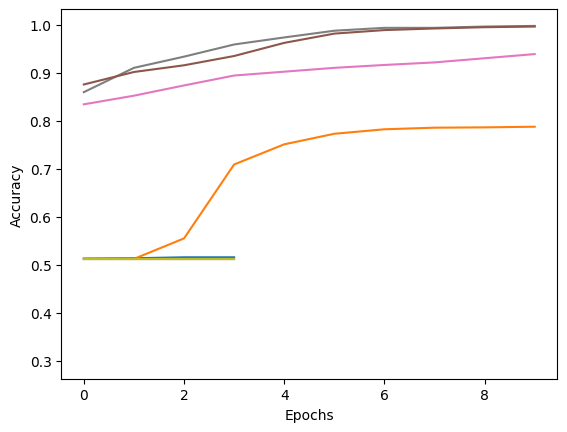

In [25]:
# Plot by epoch
ax = None  # This plots everything on the same plot
for d in dfs.values():
    ax = d.mean_accuracy.plot(ax=ax, legend=False)

ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")


### Load the best saved model

In [14]:
# best_result = results.get_best_result("mean_accuracy", mode="max")
# with best_result.checkpoint.as_directory() as checkpoint_dir:
#     state_dict = torch.load(os.path.join(checkpoint_dir, "model.pth"))

import os

checkpoint_dir = '/teamspace/studios/this_studio/ray_results/train_objecting_fun_2025-02-01_09-58-46/train_objecting_fun_206b5_00007_7_momentum=0.2752_2025-02-01_09-58-46/checkpoint_000001'
state_dict = torch.load(os.path.join(checkpoint_dir, "model.pth"))
model3 = MoonModel()
model3.load_state_dict(state_dict)


<All keys matched successfully>

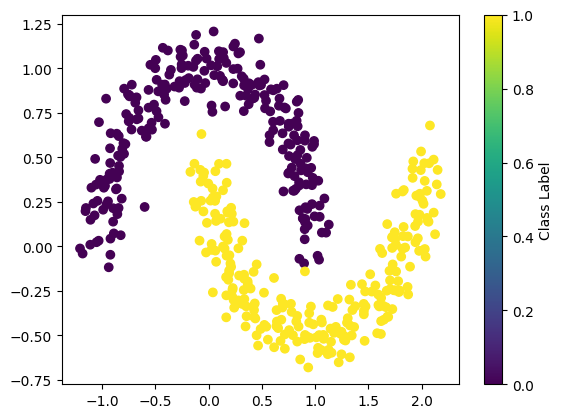

In [22]:
X, _ = datasets.make_moons(n_samples=500, shuffle=True, noise=0.1)
y = model3(torch.tensor(X).float())
y = torch.argmax(y,dim=-1)

plt.figure()
scatter = plt.scatter(X[:,0], X[:,1], c=y)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Class Label")
plt.show()